In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

import datetime as dt

import time

In [3]:
path = r'C:\Users\hard\drive\filepath\astros_bangs_20200127.xlsx'

In [4]:
# Import sign stealing data as astro
pd.set_option('display.max_columns', None)
astro = pd.read_excel(path)
astro.head(5)

,Line ID,game_id,game_pk,game_date,opponent,final_away_runs,final_home_runs,inning,top_bottom,batter,at_bat_event,pitch_type_code,pitch_category,has_bangs,bangs,call_code,description,on_1b,on_2b,on_3b,pitch_youtube_seconds,youtube_url,pitch_datetime,game_pitch_id,event_number,pitch_playid,atbat_playid,away_team_id,home_team_id
0,1,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,George Springer,Home Run,SI,FB,n,NaN,B,Ball,f,f,f,1473,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:24:41-05,170404002442,32,ca9ed282-a9c3-45a6-ac10-d216fae7ce8b,1421aabe-7063-4902-9a46-4b2c239394cb,136,117
1,2,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,George Springer,Home Run,SI,FB,n,NaN,F,Foul,f,f,f,1489,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:24:57-05,170404002458,33,7f89900c-faed-485c-a6b6-41c0a2b1c26f,1421aabe-7063-4902-9a46-4b2c239394cb,136,117
2,3,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,George Springer,Home Run,SL,BR,n,NaN,B,Ball,f,f,f,1512,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:25:20-05,170404002521,34,6c875b0c-b4e3-4521-b1c0-447ee785bff9,1421aabe-7063-4902-9a46-4b2c239394cb,136,117
3,4,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,George Springer,Home Run,SI,FB,n,NaN,E,"In play, run(s)",f,f,f,1529,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:25:37-05,170404002538,35,1421aabe-7063-4902-9a46-4b2c239394cb,1421aabe-7063-4902-9a46-4b2c239394cb,136,117
4,5,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,Alex Bregman,Single,FF,FB,n,NaN,D,"In play, no out",f,f,f,1580,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:26:28-05,170404002636,40,3a7c0b8b-3b0c-4832-90d0-5d8425d0b995,3a7c0b8b-3b0c-4832-90d0-5d8425d0b995,136,117


Analyzing the data to asses whom they used the sign stealing scheme against.

In [5]:
# Using a group by statement to to count bangs by opposing team
opponent = astro[(astro['has_bangs'] == 'y')]['opponent'].value_counts()
opp = pd.DataFrame(data= opponent)
opp = opp.reset_index()
opp.columns = ['Opp Team','Bang Count']
opp

,Opp Team,Bang Count
0,OAK,172
1,SEA,118
2,TOR,114
3,MIN,112
4,WAS,109
5,TB,108
6,CWS,107
7,NYY,85
8,TEX,47
9,ANA,47


Text(0.5, 1.0, 'Bangs against Team')

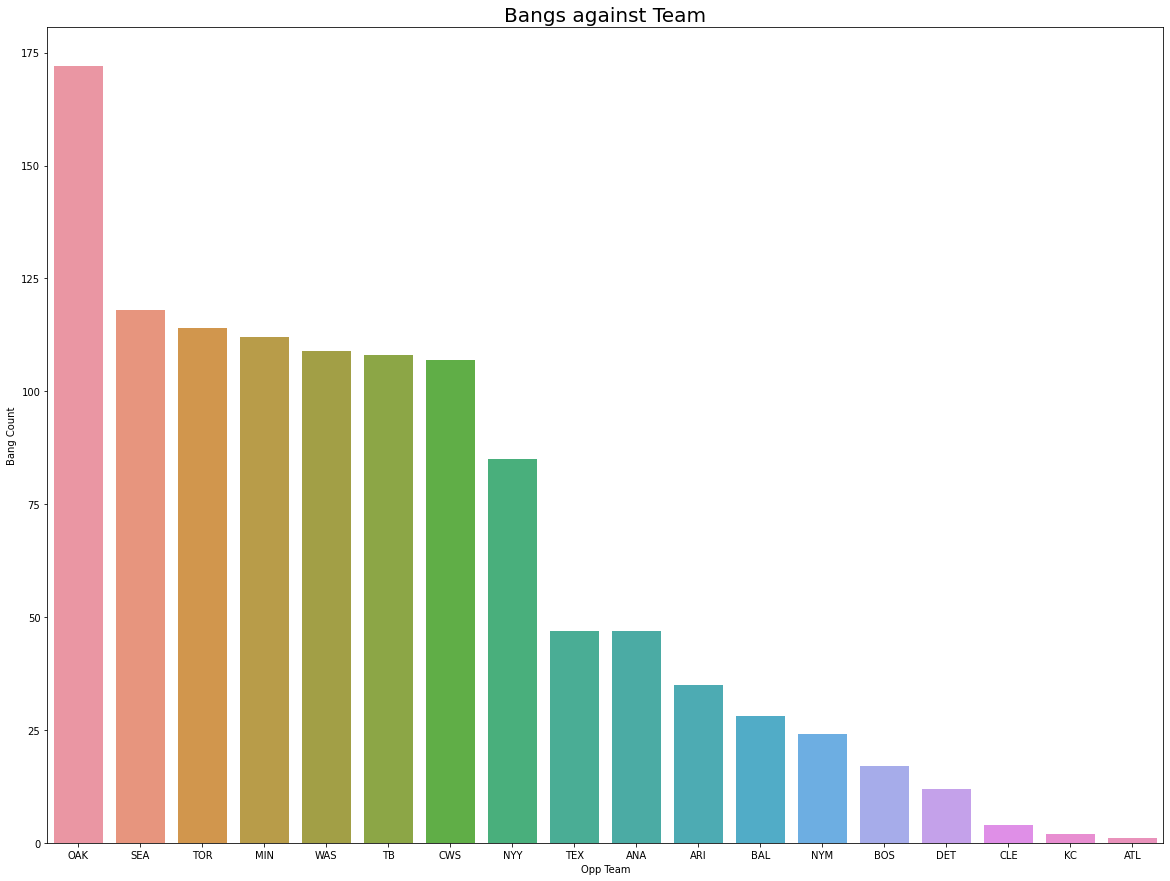

In [6]:
# plot showing the number of bangs by opponent
plt.figure(figsize=(20,15))
op = sns.barplot(data=opp, x='Opp Team', y = 'Bang Count')
op.set_title('Bangs against Team', fontsize= 20)
